# LogisticRegression and Gradient desent
Logistic回归是众多分类算法中的一员。通常，Logistic回归用于二分类问题，例如预测明天是否会下雨，当然它也可以用于多分类问题。

假设现在有一些数据点，我们利用一条直线对这些点进行拟合(该线称为最佳拟合直线)，这个拟合过程就称作为回归，如下图所示：

![title](pic/16.png)

Logistic回归是分类方法，它利用的是Sigmoid函数阈值在[0,1]这个特性。Logistic回归进行分类的主要思想是：根据现有数据对分类边界线建立回归公式，以此进行分类。其实，Logistic本质上是一个基于条件概率的判别模型(Discriminative Model)。

所以要想了解Logistic回归，我们必须先看一看Sigmoid函数 ，我们也可以称它为Logistic函数。它的公式如下：

![title](pic/18.png)

![title](pic/17.jpg)

![title](pic/19.png)


# Sigmoid:



![title](pic/20.png)

z是一个矩阵，θ是参数列向量(要求解的)，x是样本列向量(给定的数据集)。θ^T表示θ的转置。g(z)函数实现了任意实数到[0,1]的映射，这样我们的数据集([x0,x1,...,xn])，不管是大于1或者小于0，都可以映射到[0,1]区间进行分类。hθ(x)给出了输出为1的概率。比如当hθ(x)=0.7，那么说明有70%的概率输出为1。输出为0的概率是输出为1的补集，也就是30%。

如果我们有合适的参数列向量θ([θ0,θ1,...θn]^T)，以及样本列向量x([x0,x1,...,xn])，那么我们对样本x分类就可以通过上述公式计算出一个概率，如果这个概率大于0.5，我们就可以说样本是正样本，否则样本是负样本。

举个例子，对于"垃圾邮件判别问题"，对于给定的邮件(样本)，我们定义非垃圾邮件为正类，垃圾邮件为负类。我们通过计算出的概率值即可判定邮件是否是垃圾邮件。

# 如何得到合适的参数向量θ？

根据sigmoid函数的特性，我们可以做出如下的假设：

![title](pic/21.jpg)

式即为在已知样本x和参数θ的情况下，样本x属性正样本(y=1)和负样本(y=0)的条件概率。理想状态下，根据上述公式，求出各个点的概率均为1，也就是完全分类都正确。但是考虑到实际情况，样本点的概率越接近于1，其分类效果越好。比如一个样本属于正样本的概率为0.51，那么我们就可以说明这个样本属于正样本。另一个样本属于正样本的概率为0.99，那么我们也可以说明这个样本属于正样本。但是显然，第二个样本概率更高，更具说服力。我们可以把上述两个概率公式合二为一：
![title](pic/22.png)
合并出来的Cost，我们称之为代价函数(Cost Function)。当y等于1时，(1-y)项(第二项)为0；当y等于0时，y项(第一项)为0。为了简化问题，我们对整个表达式求对数，(将指数问题对数化是处理数学问题常见的方法)：
![title](pic/23.png)

其中，m为样本的总数，y(i)表示第i个样本的类别，x(i)表示第i个样本，需要注意的是θ是多维向量，x(i)也是多维向量。

综上所述，满足J(θ)的最大的θ值即是我们需要求解的模型。

怎么求解使J(θ)最大的θ值呢？因为是求最大值，所以我们需要使用梯度上升算法。如果面对的问题是求解使J(θ)最小的θ值，那么我们就需要使用梯度下降算法。面对我们这个问题，如果使J(θ) := -J(θ)，那么问题就从求极大值转换成求极小值了，使用的算法就从梯度上升算法变成了梯度下降算法，它们的思想都是相同的

# 梯度上升:

![title](pic/24.png)

图像：
![title](pic/25.png)

In [1]:
import numpy as  np
import matplotlib.pyplot as plt

In [2]:
def loadDataSet(path='data/testSet.txt'):  #读取测试文件
    with open(path) as fr:
        dataMat = [];
        lableMat = []
        for line in fr.readlines():   #处理data label
            lineArr = line.strip().split()
            dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
            lableMat.append(int(lineArr[-1]))
        return dataMat, lableMat
    return -1

In [3]:
dataMat,labelMat=loadDataSet()

In [4]:
def sigmoid(inX):
    return 1 / (1 + np.exp(-inX))

In [5]:
def gradAscent(dataMatIn, classLabels):   #梯度上升
    dataMatrix = np.mat(dataMatIn)
    labelMat = np.mat(classLabels).reshape(-1, 1)
    m, n = np.shape(dataMatrix)
    weight = np.ones((n, 1))
    alpha = 0.001
    for i in range(500):
        h = sigmoid(dataMatrix * weight)
        error = labelMat - h
        weight = weight + alpha * dataMatrix.T * error  #这里是根据costfuc推导出来的公式
    return weight

In [6]:
def plotBestFit(wei):   #画图
    weights=np.array(wei)
    dataMat, labelMat = loadDataSet()
    dataArr = np.array(dataMat)
    n = np.shape(dataArr)[0]
    xcord1 = [];
    ycord1 = []
    xcord2 = [];
    ycord2 = []
    for i in range(n):
        if int(labelMat[i]) == 1:
            xcord1.append(dataArr[i, 1]);
            ycord1.append(dataArr[i, 2])
        else:
            xcord2.append(dataArr[i, 1]);
            ycord2.append(dataArr[i, 2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x = np.arange(-3.0, 3.0, 0.1)
    y = (-weights[0] - weights[1] * x.reshape(-1,1)) / weights[2]
    ax.plot(x, y)
    plt.xlabel('X1');
    plt.ylabel('X2');
    plt.show()

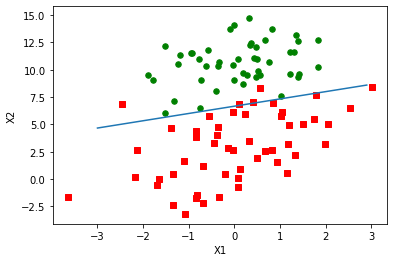

In [7]:
plotBestFit([4,0.4,-0.6])

In [8]:
def stocGradAscent0(dataMatrix, classLabels):
    m, n = np.shape(dataMatrix)
    alpha = 0.01
    weights = np.ones(n)
    allweights=[]
    for i in range(m):
        h = sigmoid(sum(dataMatrix[i] * weights))
        error = classLabels[i] - h
        weights = weights + alpha * error * dataMatrix[i]
        allweights.append(weights)
    return weights#,allweights

In [9]:
weights=stocGradAscent0(np.array(dataMat),labelMat)

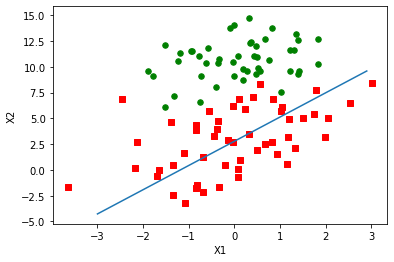

In [10]:
plotBestFit(weights)

In [11]:
import  random
def stocGradAscent1(dataMatrix,classLabels,numIter=200):
    m,n=np.shape(dataMatrix)
    weights=np.ones(n)
    for i in range(numIter):
        for j in range(m):
            alpha=4.0/(5+i+j)+0.005
            Index=random.randint(0,m-1)
            h=sigmoid(sum(dataMatrix[Index]*weights))
            error=classLabels[Index]-h
            weights=weights+alpha*error*dataMatrix[Index]
    return weights

In [12]:
w1=stocGradAscent1(np.array(dataMat),labelMat)
w1

array([12.67739518,  1.01691832, -1.62084593])

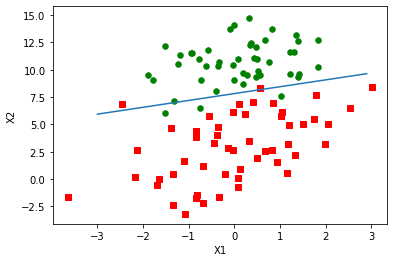

In [13]:
plotBestFit(w1)

In [14]:
def classifyVector(inX,weights):
    prob=sigmoid(sum(inX*weights))
    if prob>0.5:return 1.0
    else:return 0.0

In [15]:
def colicTest(path=r'data\{}.txt'):
    frtrain=open(path.format('horseColicTraining'))
    frtest=open(path.format('horseColicTest'))
    trainingSet=[];trainLabels=[]
    for line in frtrain.readlines():
        currline=line.strip().split('\t')
        trainingSet.append([float(currline[i]) for i in range(21)])
        trainLabels.append(float(currline[21]))
    trainWeights=stocGradAscent1(np.array(trainingSet),trainLabels,1400)
    errorCount=0;numTestVec=0.0
    for line in frtest.readlines():
        numTestVec+=1.0
        currline=line.strip().split('\t')
        lineArr=[float(currline[i]) for i in range(21)]
        if int(classifyVector(np.array(lineArr),trainWeights))!=int(currline[21]):
            errorCount+=1
    print('error:%f'%(errorCount/numTestVec))
    return errorCount/numTestVec

In [16]:
colicTest()

error:0.283582


0.2835820895522388

In [17]:
def multiTest():
    numTests = 3; errorSum=0.0
    for k in range(numTests):
        errorSum += colicTest()
    print ("after %d iterations the average error rate is: %f" % (numTests, errorSum/float(numTests)))

In [18]:
multiTest()

error:0.268657
error:0.402985
error:0.373134
after 3 iterations the average error rate is: 0.348259
